<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/RNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5

## RNN Models

## Tensorflow

Persiapan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

In [2]:
# Bersihkan spasi di nama kolom
df.columns = df.columns.str.strip()

# Cek nama kolom setelah dibersihkan
print("\nNama-nama kolom setelah dibersihkan:")
print(df.columns.tolist())


Nama-nama kolom setelah dibersihkan:
['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']


In [3]:
# Tampilkan nama-nama kolom yang tersedia
print("Kolom-kolom yang ada di dataset:")
print(df.columns.tolist())


Kolom-kolom yang ada di dataset:
['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']


In [4]:
# Kolom yang digunakan
text_column = 'Review Text'
label_column = 'Recommended IND'

# Hapus data yang Review-nya kosong/null
df = df.dropna(subset=[text_column, label_column])



In [5]:
# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df[text_column])

# Konversi ke sequence dan padding
sequences = tokenizer.texts_to_sequences(df[text_column])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

# Ambil label
labels = df[label_column].values

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 18112
Jumlah data uji: 4529


Membuat dan Melatih Model RNN



In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=100),
    tf.keras.layers.SimpleRNN(64, return_sequences=False),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8123 - loss: 0.4925 - val_accuracy: 0.8207 - val_loss: 0.4704
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.8219 - loss: 0.4676 - val_accuracy: 0.8207 - val_loss: 0.4702
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8176 - loss: 0.4662 - val_accuracy: 0.8147 - val_loss: 0.4946
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8341 - loss: 0.4270 - val_accuracy: 0.8048 - val_loss: 0.5091
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8509 - loss: 0.3915 - val_accuracy: 0.8042 - val_loss: 0.5539
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8641 - loss: 0.3604 - val_accuracy: 0.7803 - val_loss: 0.6133
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8674 - loss: 0.3448 - val_accuracy: 0.7836 - val_loss: 0.6648
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8735 - loss: 0.3301 - 

Visualisasi Akurasi dan Loss

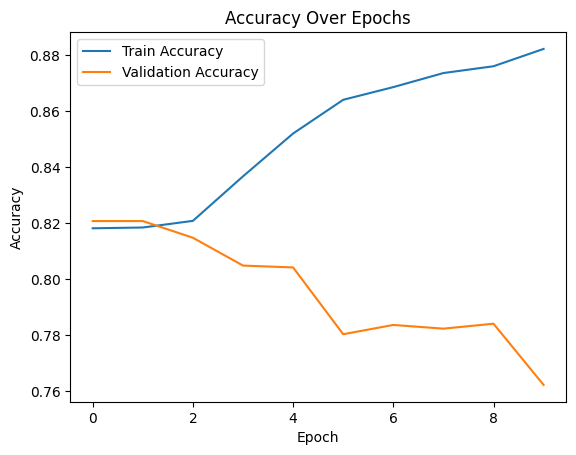

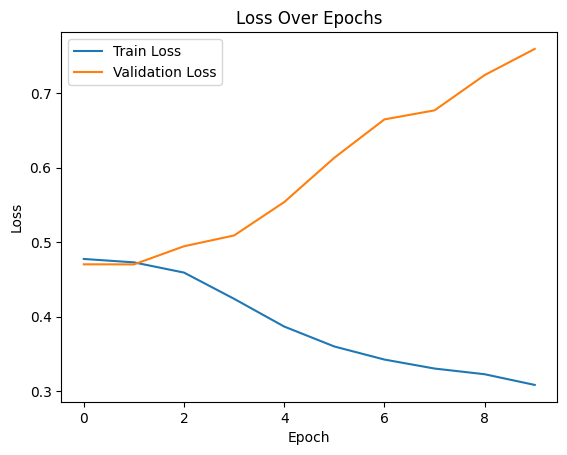

In [8]:
# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluasi Model

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.17      0.09      0.12       812
           1       0.82      0.91      0.86      3717

    accuracy                           0.76      4529
   macro avg       0.50      0.50      0.49      4529
weighted avg       0.70      0.76      0.73      4529



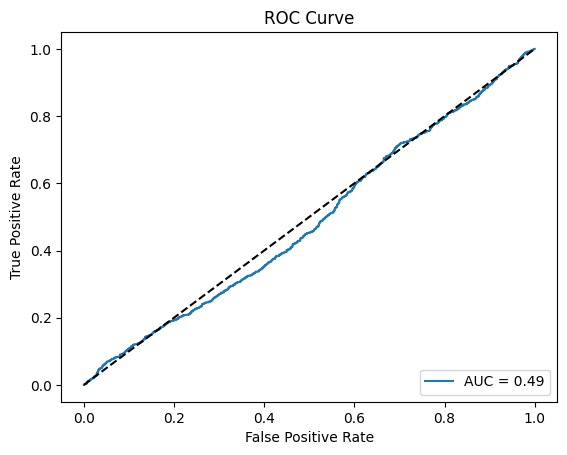

In [9]:
# Prediksi probabilitas
y_pred_prob = model.predict(X_test).ravel()
# Konversi ke kelas
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# ROC Curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # garis acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Pytorch

Install dan Import Library

In [10]:
import pandas as pd
import numpy as np
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tqdm import tqdm



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

Load dan Preprocessing Data

In [11]:
# Load data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

In [12]:
# Bersihkan nama kolom
df.columns = df.columns.str.strip()

# Ganti nama kolom yang digunakan
text_column = 'Review Text'
label_column = 'Recommended IND'

# Hapus baris yang kosong pada kolom teks atau label
df = df.dropna(subset=[text_column, label_column])

# Bersihkan teks
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Terapkan pembersihan teks
df[text_column] = df[text_column].apply(clean_text)


In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[label_column], test_size=0.2, random_state=42)

# Tampilkan contoh data
print("Contoh X_train:", X_train.iloc[0])
print("Label:", y_train.iloc[0])


Contoh X_train: this top looks better on than on the hanger ive been looking for a feminine plaid top and this is the one its a flirty and innocent look in one i would say size up it runs a little tight around the upper arm shoulders area when stretching arms out i normally wear a size depending on the top and the felt better
Label: 1


Tokenisasi dan Vocab

In [14]:
from collections import Counter
import torch
from torch.nn.utils.rnn import pad_sequence
import nltk
nltk.download('punkt')

# Tokenizer
def tokenizer(text):
    return re.findall(r'\b\w+\b', text.lower())  # split by word

# Build vocab (manual)
counter = Counter()
for sentence in X_train:
    counter.update(tokenizer(sentence))

vocab = {'<pad>': 0, '<unk>': 1}
for word, _ in counter.most_common(10000):
    vocab[word] = len(vocab)

# Encode text
def encode(text):
    return [vocab.get(token, vocab['<unk>']) for token in tokenizer(text)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset dan DataLoader

In [15]:
class ReviewDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = [torch.tensor(encode(text)) for text in texts]
        self.labels = torch.tensor(labels.values, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

def collate_fn(batch):
    texts, labels = zip(*batch)
    padded_texts = pad_sequence(texts, batch_first=True, padding_value=vocab['<pad>'])
    return padded_texts, torch.tensor(labels)

train_dataset = ReviewDataset(X_train, y_train)
test_dataset = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


Bangun Model RNN

In [16]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab['<pad>'])
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        embedded = self.embedding(x)
        out, _ = self.rnn(embedded)
        out = out[:, -1, :]  # ambil hidden state terakhir
        return torch.sigmoid(self.fc(out)).squeeze()

model = RNNModel(len(vocab), embed_dim=64, hidden_dim=64)


Training Model

In [17]:
!pip install torch==2.2.0 torchvision torchaudio --quiet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_accuracies = [], []

for epoch in range(10):
    model.train()
    epoch_loss = 0
    correct = total = 0
    for x_batch, y_batch in tqdm(train_loader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        preds = model(x_batch)
        loss = criterion(preds, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        correct += ((preds > 0.5).float() == y_batch).sum().item()
        total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Accuracy={acc:.4f}")
    train_losses.append(epoch_loss)
    val_accuracies.append(acc)


100%|██████████| 566/566 [00:21<00:00, 26.23it/s]


Epoch 1: Loss=270.6565, Accuracy=0.8183


100%|██████████| 566/566 [00:27<00:00, 20.40it/s]


Epoch 2: Loss=268.6192, Accuracy=0.8184


100%|██████████| 566/566 [00:22<00:00, 25.58it/s]


Epoch 3: Loss=267.3599, Accuracy=0.8192


100%|██████████| 566/566 [00:27<00:00, 20.60it/s]


Epoch 4: Loss=267.3165, Accuracy=0.8192


100%|██████████| 566/566 [00:40<00:00, 13.91it/s]


Epoch 5: Loss=270.4692, Accuracy=0.8095


100%|██████████| 566/566 [00:59<00:00,  9.44it/s]


Epoch 6: Loss=268.8302, Accuracy=0.8184


100%|██████████| 566/566 [00:57<00:00,  9.89it/s]


Epoch 7: Loss=267.7115, Accuracy=0.8187


100%|██████████| 566/566 [00:58<00:00,  9.64it/s]


Epoch 8: Loss=267.7000, Accuracy=0.8185


100%|██████████| 566/566 [00:59<00:00,  9.54it/s]


Epoch 9: Loss=271.9704, Accuracy=0.8073


100%|██████████| 566/566 [01:01<00:00,  9.21it/s]


Epoch 10: Loss=268.9782, Accuracy=0.8146


Evaluasi

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       812
         1.0       0.82      1.00      0.90      3717

    accuracy                           0.82      4529
   macro avg       0.41      0.50      0.45      4529
weighted avg       0.67      0.82      0.74      4529

AUC Score: 0.500994134259977


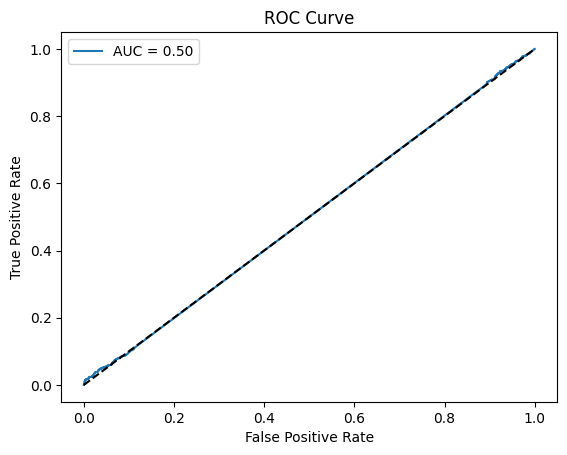

In [21]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        preds = model(x_batch).detach().cpu()
        all_preds.extend(preds.squeeze().tolist())
        all_labels.extend(y_batch.cpu().squeeze().tolist())


# Prediksi label
y_pred = np.array(all_preds) > 0.5
y_true = np.array(all_labels)

print(classification_report(y_true, y_pred))
print("AUC Score:", roc_auc_score(y_true, all_preds))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, all_preds)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, all_preds):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Visualisasi Akurasi & Loss

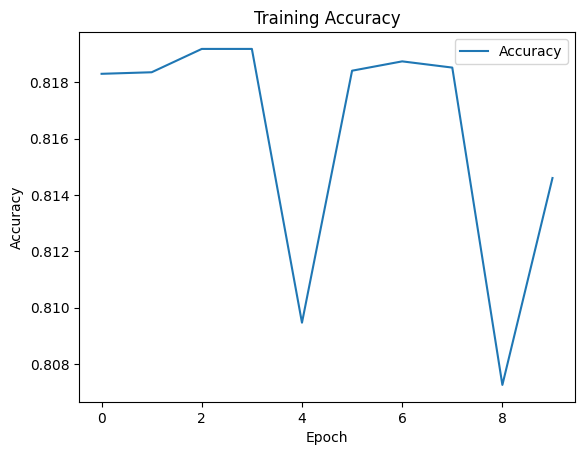

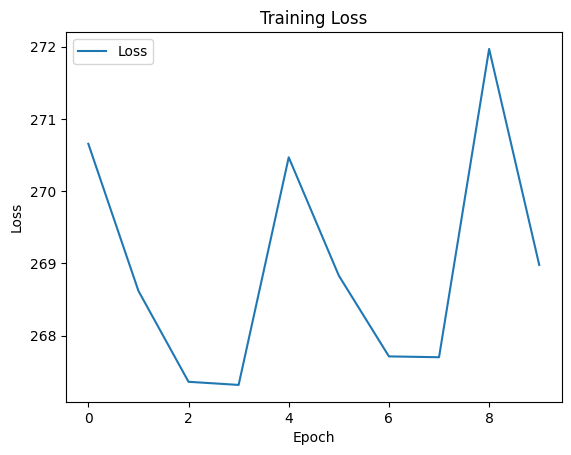

In [22]:
plt.plot(val_accuracies, label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Persamaan Matematika

RNN dirancang untuk menangani data sekuensial seperti teks. Di setiap waktu t, RNN menerima input x_t dan hidden state sebelumnya h_{t-1} untuk menghasilkan hidden state saat ini h_t.

Hidden State Update

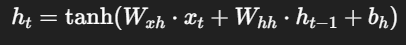

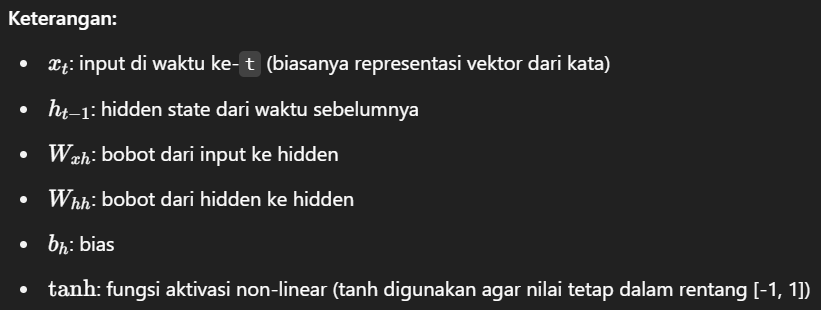

Output Prediction
Jika RNN digunakan untuk klasifikasi (misalnya, sentimen positif/negatif), maka biasanya hanya hidden state terakhir yang digunakan untuk prediksi:

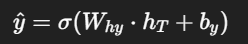

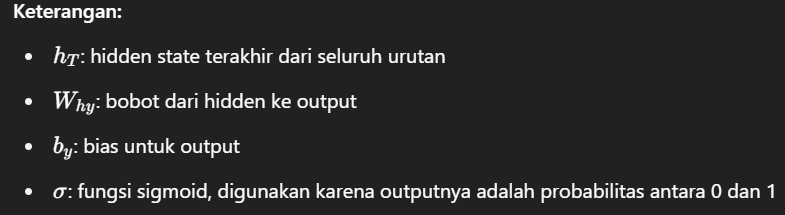